In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pandas.io.json import json_normalize

plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [2]:
conn = MongoClient(host='127.0.0.1', port=27017)  # 实例化MongoClient
db = conn.get_database('Github996')  # 连接到Github996数据库

In [3]:
users = db.get_collection('users') 
data = users.find()  # 查询这个集合下的所有记录
user_data = json_normalize([record for record in data])

In [4]:
issues = db.get_collection('issues') 
data = issues.find()  # 查询这个集合下的所有记录
issues_data = json_normalize([record for record in data])

In [6]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39987 entries, 0 to 39986
Data columns (total 32 columns):
_id                    39987 non-null object
avatar_url             39987 non-null object
bio                    10192 non-null object
blog                   39987 non-null object
company                5503 non-null object
created_at             39987 non-null object
email                  12729 non-null object
events_url             39987 non-null object
followers              39987 non-null int64
followers_url          39987 non-null object
following              39987 non-null int64
following_url          39987 non-null object
gists_url              39987 non-null object
gravatar_id            39987 non-null object
hireable               2998 non-null object
html_url               39987 non-null object
id                     39987 non-null int64
location               11293 non-null object
login                  39987 non-null object
name                   21229 non-null obj

In [7]:
user_data.to_csv('users_data.csv', index=False)
issues_data.to_csv('issues_data.csv', index=False)

### 1. User数据清洗

In [8]:
user_data.sample(5)

,_id,avatar_url,bio,blog,company,created_at,email,events_url,followers,followers_url,...,public_gists,public_repos,received_events_url,repos_url,site_admin,starred_url,subscriptions_url,type,updated_at,url
11573,5c9d11556b678c3a645f6f63,https://avatars0.githubusercontent.com/u/36983...,NaN,NaN,NaN,2018-03-02T07:31:00Z,NaN,https://api.github.com/users/hshjf1990/events{...,0,https://api.github.com/users/hshjf1990/followers,...,0,0,https://api.github.com/users/hshjf1990/receive...,https://api.github.com/users/hshjf1990/repos,False,https://api.github.com/users/hshjf1990/starred...,https://api.github.com/users/hshjf1990/subscri...,User,2019-03-28T02:57:16Z,https://api.github.com/users/hshjf1990
16710,5c9d132b6b678c3a645f97f7,https://avatars0.githubusercontent.com/u/21072...,Just not want to be an ordinary people.,NaN,今日头条,2016-08-17T03:08:48Z,747853229@qq.com,https://api.github.com/users/PeterChen1997/eve...,29,https://api.github.com/users/PeterChen1997/fol...,...,1,56,https://api.github.com/users/PeterChen1997/rec...,https://api.github.com/users/PeterChen1997/repos,False,https://api.github.com/users/PeterChen1997/sta...,https://api.github.com/users/PeterChen1997/sub...,User,2019-03-03T15:45:33Z,https://api.github.com/users/PeterChen1997
35619,5c9d1c906b678c3a64602dec,https://avatars2.githubusercontent.com/u/15088...,NaN,NaN,NaN,2015-10-12T11:55:54Z,NaN,https://api.github.com/users/DabanC/events{/pr...,3,https://api.github.com/users/DabanC/followers,...,0,12,https://api.github.com/users/DabanC/received_e...,https://api.github.com/users/DabanC/repos,False,https://api.github.com/users/DabanC/starred{/o...,https://api.github.com/users/DabanC/subscriptions,User,2019-03-22T16:45:31Z,https://api.github.com/users/DabanC
22606,5c9d16576b678c3a645fc6c4,https://avatars0.githubusercontent.com/u/11060...,NaN,NaN,NaN,2015-02-18T13:59:05Z,NaN,https://api.github.com/users/qiusl/events{/pri...,0,https://api.github.com/users/qiusl/followers,...,0,3,https://api.github.com/users/qiusl/received_ev...,https://api.github.com/users/qiusl/repos,False,https://api.github.com/users/qiusl/starred{/ow...,https://api.github.com/users/qiusl/subscriptions,User,2019-03-28T06:09:59Z,https://api.github.com/users/qiusl
2,5c9d076c6b678c3a645f1250,https://avatars0.githubusercontent.com/u/12967...,NaN,NaN,NaN,2015-06-19T13:57:11Z,n1085633848@outlook.com,https://api.github.com/users/YueNing/events{/p...,7,https://api.github.com/users/YueNing/followers,...,0,29,https://api.github.com/users/YueNing/received_...,https://api.github.com/users/YueNing/repos,False,https://api.github.com/users/YueNing/starred{/...,https://api.github.com/users/YueNing/subscript...,User,2019-03-25T10:50:50Z,https://api.github.com/users/YueNing


In [9]:
user_data.iloc[666]

_id                                             5c9d08ab6b678c3a645f1857
avatar_url             https://avatars2.githubusercontent.com/u/14572...
bio                                                          智者务其实 愚者争虚名
blog                                                           dwbbb.com
company                                                            Qunar
created_at                                          2015-09-21T13:56:07Z
email                                                                NaN
events_url             https://api.github.com/users/dwb1994/events{/p...
followers                                                             36
followers_url             https://api.github.com/users/dwb1994/followers
following                                                             22
following_url          https://api.github.com/users/dwb1994/following...
gists_url              https://api.github.com/users/dwb1994/gists{/gi...
gravatar_id                                        

In [10]:
user_data.columns

Index(['_id', 'avatar_url', 'bio', 'blog', 'company', 'created_at', 'email',
       'events_url', 'followers', 'followers_url', 'following',
       'following_url', 'gists_url', 'gravatar_id', 'hireable', 'html_url',
       'id', 'location', 'login', 'name', 'node_id', 'organizations_url',
       'public_gists', 'public_repos', 'received_events_url', 'repos_url',
       'site_admin', 'starred_url', 'subscriptions_url', 'type', 'updated_at',
       'url'],
      dtype='object')

In [11]:
# 先去除对于分析无用的字段
user_data.drop(columns = ['_id', 'avatar_url', 'events_url', 'followers_url', 'following_url',
                         'gists_url', 'gravatar_id', 'html_url', 'node_id', 'public_gists', 
                          'received_events_url', 'repos_url', 'site_admin', 'starred_url', 
                         'subscriptions_url', 'type'], 
              inplace = True)

In [12]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39987 entries, 0 to 39986
Data columns (total 16 columns):
bio                  10174 non-null object
blog                 6517 non-null object
company              5470 non-null object
created_at           39987 non-null object
email                12729 non-null object
followers            39987 non-null int64
following            39987 non-null int64
hireable             2998 non-null object
id                   39987 non-null int64
location             11286 non-null object
login                39987 non-null object
name                 21224 non-null object
organizations_url    39987 non-null object
public_repos         39987 non-null int64
updated_at           39987 non-null object
url                  39987 non-null object
dtypes: int64(4), object(12)
memory usage: 4.9+ MB


In [13]:
# 时间类型转换
user_data['created_at'] = pd.to_datetime(user_data['created_at'])
user_data['updated_at'] = pd.to_datetime(user_data['updated_at'])

### 2. Issues数据清洗

In [14]:
issues_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 45 columns):
_id                         10037 non-null object
assignee                    0 non-null float64
assignees                   10037 non-null object
author_association          10037 non-null object
body                        4547 non-null object
closed_at                   0 non-null float64
comments                    10037 non-null int64
comments_url                10037 non-null object
created_at                  10037 non-null object
events_url                  10037 non-null object
html_url                    10037 non-null object
id                          10037 non-null int64
labels                      10037 non-null object
labels_url                  10037 non-null object
locked                      10037 non-null bool
milestone                   0 non-null float64
node_id                     10037 non-null object
number                      10037 non-null int64
pull_r

In [15]:
issues_data.sample(5)

,_id,assignee,assignees,author_association,body,closed_at,comments,comments_url,created_at,events_url,...,user.login,user.node_id,user.organizations_url,user.received_events_url,user.repos_url,user.site_admin,user.starred_url,user.subscriptions_url,user.type,user.url
3715,5c9cebc9ff314fc01c0bf80b,NaN,[],NONE,NaN,NaN,0,https://api.github.com/repos/996icu/996.ICU/is...,2019-03-28T05:26:11Z,https://api.github.com/repos/996icu/996.ICU/is...,...,Beerus-Lee,MDQ6VXNlcjE3MjY2NzA5,https://api.github.com/users/Beerus-Lee/orgs,https://api.github.com/users/Beerus-Lee/receiv...,https://api.github.com/users/Beerus-Lee/repos,False,https://api.github.com/users/Beerus-Lee/starre...,https://api.github.com/users/Beerus-Lee/subscr...,User,https://api.github.com/users/Beerus-Lee
301,5c9ce620ff314fc01c0bdb59,NaN,[],NONE,NaN,NaN,0,https://api.github.com/repos/996icu/996.ICU/is...,2019-03-28T02:23:49Z,https://api.github.com/repos/996icu/996.ICU/is...,...,zlyyyy,MDQ6VXNlcjIyNzYwOTMy,https://api.github.com/users/zlyyyy/orgs,https://api.github.com/users/zlyyyy/received_e...,https://api.github.com/users/zlyyyy/repos,False,https://api.github.com/users/zlyyyy/starred{/o...,https://api.github.com/users/zlyyyy/subscriptions,User,https://api.github.com/users/zlyyyy
6695,5c9cf069ff314fc01c0c18a9,NaN,[],NONE,NaN,NaN,0,https://api.github.com/repos/996icu/996.ICU/is...,2019-03-28T01:43:14Z,https://api.github.com/repos/996icu/996.ICU/is...,...,lvdengxia,MDQ6VXNlcjQxNDk1NjEy,https://api.github.com/users/lvdengxia/orgs,https://api.github.com/users/lvdengxia/receive...,https://api.github.com/users/lvdengxia/repos,False,https://api.github.com/users/lvdengxia/starred...,https://api.github.com/users/lvdengxia/subscri...,User,https://api.github.com/users/lvdengxia
4731,5c9cebfaff314fc01c0c0256,NaN,[],NONE,大型项目跟一波节奏，简历可以吹一下,NaN,0,https://api.github.com/repos/996icu/996.ICU/is...,2019-03-28T08:14:59Z,https://api.github.com/repos/996icu/996.ICU/is...,...,MoMuBai,MDQ6VXNlcjE2MzgwMzk5,https://api.github.com/users/MoMuBai/orgs,https://api.github.com/users/MoMuBai/received_...,https://api.github.com/users/MoMuBai/repos,False,https://api.github.com/users/MoMuBai/starred{/...,https://api.github.com/users/MoMuBai/subscript...,User,https://api.github.com/users/MoMuBai
989,5c9ce626ff314fc01c0be0b9,NaN,[],NONE,NaN,NaN,0,https://api.github.com/repos/996icu/996.ICU/is...,2019-03-27T12:22:46Z,https://api.github.com/repos/996icu/996.ICU/is...,...,Akatsuki-Ryu,MDQ6VXNlcjgwNjIyMDk=,https://api.github.com/users/Akatsuki-Ryu/orgs,https://api.github.com/users/Akatsuki-Ryu/rece...,https://api.github.com/users/Akatsuki-Ryu/repos,False,https://api.github.com/users/Akatsuki-Ryu/star...,https://api.github.com/users/Akatsuki-Ryu/subs...,User,https://api.github.com/users/Akatsuki-Ryu


In [16]:
issues_data.iloc[888]

_id                                                  5c9ce625ff314fc01c0bdfef
assignee                                                                  NaN
assignees                                                                  []
author_association                                                       NONE
body                                                                      NaN
closed_at                                                                 NaN
comments                                                                    0
comments_url                https://api.github.com/repos/996icu/996.ICU/is...
created_at                                               2019-03-28T02:01:06Z
events_url                  https://api.github.com/repos/996icu/996.ICU/is...
html_url                        https://github.com/996icu/996.ICU/issues/2509
id                                                                  426259315
labels                                                          

In [17]:
# 由于字段太多，直接抽取想要的字段
issues_data = issues_data[['comments', 'id', 'title', 'updated_at', 'user.id']]

In [18]:
issues_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 5 columns):
comments      10037 non-null int64
id            10037 non-null int64
title         10037 non-null object
updated_at    10037 non-null object
user.id       10037 non-null int64
dtypes: int64(3), object(2)
memory usage: 392.1+ KB


In [19]:
# 时间类型转换
issues_data['updated_at'] = pd.to_datetime(issues_data['updated_at'])

### 3. 问题
User_data拥有的字段：用户简介、博客、所在单位、账号创建时间、email、关注者数、被关注者数、是否能雇用、ID、所在地址、名字、组织url、公开repos数、更新时间等

Issues_data拥有的字段：issue评论数、ID、issue题目、更新时间、提问者ID

- 3.1 关注996的程序员，都来自于哪些单位？
- 3.2 关注996的程序员，都来自于哪些城市？
- 3.3 关注996的程序员的画像
- 3.4 大家所关注的问题都有哪些？
- 3.5 关注996的程序员的简介词云图

#### 3.1 关注996的程序员，都来自于哪些单位？

In [20]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39987 entries, 0 to 39986
Data columns (total 16 columns):
bio                  10174 non-null object
blog                 6517 non-null object
company              5470 non-null object
created_at           39987 non-null datetime64[ns]
email                12729 non-null object
followers            39987 non-null int64
following            39987 non-null int64
hireable             2998 non-null object
id                   39987 non-null int64
location             11286 non-null object
login                39987 non-null object
name                 21224 non-null object
organizations_url    39987 non-null object
public_repos         39987 non-null int64
updated_at           39987 non-null datetime64[ns]
url                  39987 non-null object
dtypes: datetime64[ns](2), int64(4), object(10)
memory usage: 4.9+ MB


In [21]:
# 单位字段太乱了！先把爬名前50的提出来
user_data['company'].value_counts()[:50]

Tencent                                               79
Baidu                                                 37
Alibaba                                               36
Zhejiang University                                   30
JD                                                    29
Tsinghua University                                   23
Shanghai Jiao Tong University                         20
baidu                                                 20
UESTC                                                 20
Peking University                                     18
Nanjing University                                    17
SJTU                                                  17
None                                                  17
none                                                  16
China                                                 15
Netease                                               15
USTC                                                  14
ZJU                            

In [22]:
user_data['company'].value_counts()[:100].index

Index(['Tencent', 'Baidu', 'Alibaba', 'Zhejiang University', 'JD',
       'Tsinghua University', 'Shanghai Jiao Tong University', 'baidu',
       'UESTC', 'Peking University', 'Nanjing University', 'SJTU', 'None',
       'none', 'China', 'Netease', 'USTC', 'ZJU', '@Alibaba', 'BUPT',
       'Wuhan University', 'ThoughtWorks', 'alibaba', 'NetEase',
       'Fudan University', '@Tencent', 'meituan', 'HUST',
       'Harbin Institute of Technology', 'Xidian University', 'Bytedance',
       '百度', '@alibaba', 'Beijing Institute of Technology', 'Alibaba Group',
       'JD.COM', 'Alibaba Inc.', 'NJU', 'Alipay', 'baidu.com',
       'Beijing University of Posts and Telecommunications',
       'Carnegie Mellon University', 'JD.com', 'Beihang University', 'SYSU',
       'Microsoft', 'free', 'South China University of Technology', 'Google',
       'tencent', 'eleme', 'Freelancer', 'DiDi', 'no', 'BIT', 'HIT',
       'Southeast University', 'Huawei', 'Baidu, Inc.', 'Neusoft',
       'Sun Yat-sen Univer

In [23]:
def get_company(data):
    for com in ['encent', '腾讯']:
        if com in data:
            return '腾讯'
    for com1 in ['aidu', '百度']:
        if com1 in data:
            return '百度'
    for com2 in ['libaba', '淘宝', 'aobao', 'lipay', '阿里巴巴', 'liyun', '阿里云']:
        if com2 in data:
            return '阿里系'
    for com3 in ['JD', 'jd', '京东']:
        if com3 in data:
            return '京东'
    for com4 in ['etease', 'etEase', '网易']:
        if com4 in data:
            return '网易'
    for com5 in ['eituan', '美团']:
        if com5 in data:
            return '美团'
    for com6 in ['ytedance', '字节', '头条']:
        if com6 in data:
            return '头条'
    for com7 in ['eleme', '饿了么']:
        if com7 in data:
            return '饿了么'
    for com8 in ['uawei', '华为']:
        if com8 in data:
            return '华为'
    for com9 in['didi', 'DiDi', '滴滴', '嘀嘀']:
        if com9 in data:
            return '滴滴'

In [24]:
user_data['company_top'] = user_data.loc[user_data['company'].notna(), 'company'].apply(get_company)

In [25]:
top10_com = user_data['company_top'].value_counts()

In [26]:
from pyecharts import Bar

bar = Bar("关注996工作制的程序员所在公司Top10", width = 700,height=500)
bar.add("", top10_com.index, top10_com.values, is_stack=True, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True,
       xaxis_rotate=30)
bar

In [27]:
def get_uni(data):
    for uni in ['hejiang', 'ZJU', 'zju', '浙江大学', '浙大']:
        if uni in data:
            return '浙大'
    for uni2 in ['singhua', '清华大学']:
        if uni2 in data:
            return '清华'
    for uni3 in ['Shanghai Jiao Tong', 'SJTU', '上海交大', '上海交通大学']:
        if uni3 in data:
            return '上海交大'
    for uni4 in ['UESTC', '电子科大', '电子科技大学']:
        if uni4 in data:
            return '电子科大'
    for uni5 in ['Wuhan', '武大', '武汉大学']:
        if uni5 in data:
            return '武大'
    for uni6 in ['USTC', '中科大', '中国科学技术大学']:
        if uni6 in data:
            return '中科大'
    for uni7 in ['Fudan', '复旦']:
        if uni7 in data:
            return '复旦'
    for uni8 in ['arbin', '哈']:
        if uni8 in data:
            return '哈工大'
    for uni9 in ['BUPT', '北邮', '北京邮电']:
        if uni9 in data:
            return '北邮'

In [28]:
user_data['uni_top'] = user_data.loc[user_data['company'].notna(), 'company'].apply(get_uni)

In [29]:
top10_uni = user_data['uni_top'].value_counts()

In [30]:
bar = Bar("关注996工作制的程序员所在大学Top10", width = 700,height=500)
bar.add("", top10_uni.index, top10_uni.values, is_stack=True, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True,
       xaxis_rotate=30)
bar

#### 3.2 关注996的程序员，都来自于哪些城市？

In [31]:
user_data['location'].value_counts()[:50]

China               762
Beijing             668
Shanghai            395
Beijing, China      308
beijing             237
Shanghai, China     233
北京                  225
shanghai            218
china               186
BeiJing             156
Hangzhou            136
Beijing,China       135
ShangHai            129
Hangzhou, China     123
上海                  112
Shenzhen, China     109
Shenzhen            105
shenzhen            104
Beijing China       100
深圳                   93
hangzhou             92
杭州                   91
HangZhou             89
Guangzhou            89
Shanghai,China       71
ShenZhen             71
Guangzhou, China     69
Shanghai China       67
Chengdu              56
Chengdu, China       56
GuangZhou            50
中国                   48
Nanjing, China       47
chengdu              45
广州                   45
Shenzhen,China       44
Nanjing              42
guangzhou            40
成都                   39
Hangzhou,China       38
ChengDu              37
ShangHai, China 

In [89]:
user_data['location'].value_counts()[:50].index

Index(['China', 'Beijing', 'Shanghai', 'Beijing, China', 'beijing',
       'Shanghai, China', '北京', 'shanghai', 'china', 'BeiJing', 'Hangzhou',
       'Beijing,China', 'ShangHai', 'Hangzhou, China', '上海', 'Shenzhen, China',
       'Shenzhen', 'shenzhen', 'Beijing China', '深圳', 'hangzhou', '杭州',
       'HangZhou', 'Guangzhou', 'Shanghai,China', 'ShenZhen',
       'Guangzhou, China', 'Shanghai China', 'Chengdu', 'Chengdu, China',
       'GuangZhou', '中国', 'Nanjing, China', 'chengdu', '广州', 'Shenzhen,China',
       'Nanjing', 'guangzhou', '成都', 'Hangzhou,China', 'ChengDu',
       'ShangHai, China', 'Singapore', 'Guangzhou,China', 'China Beijing',
       'Hong Kong', 'Wuhan', 'nanjing', 'Beijing.China', 'HangZhou China'],
      dtype='object')

In [33]:
def get_city(data):
    for city in ['eijing', '北京']:
        if city in data:
            return '北京'
    for city1 in ['hanghai', '上海']:
        if city1 in data:
            return '上海'
    for city2 in ['Hangzhou', 'hangzhou', '杭州']:
        if city2 in data:
            return '杭州'
    for city3 in ['henzhen', '深圳']:
        if city3 in data:
            return '深圳'
    for city4 in ['Guangzhou', 'guangzhou', '广州']:
        if city4 in data:
            return '广州'
    for city5 in ['hengdu', '成都']:
        if city5 in data:
            return '成都'
    for city6 in ['anjing', '南京']:
        if city6 in data:
            return '南京'
    for city7 in ['ingapore', '新加坡']:
        if city7 in data:
            return '新加坡'
    for city8 in ['Hong Kong', 'hong kong', '香港']:
        if city8 in data:
            return '香港'
    for city9 in ['uhan', '武汉']:
        if city9 in data:
            return '武汉'

In [34]:
user_data['city_top'] = user_data.loc[user_data['location'].notna(), 'location'].apply(get_city)

In [35]:
top10_city = user_data['city_top'].value_counts()

In [36]:
bar = Bar("关注996工作制的程序员所在城市Top10", width = 700,height=500)
bar.add("", top10_city.index, top10_city.values, is_stack=True, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True,
       xaxis_rotate=30)
bar

#### 3.3 关注996的程序员的画像

In [37]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39987 entries, 0 to 39986
Data columns (total 19 columns):
bio                  10174 non-null object
blog                 6517 non-null object
company              5470 non-null object
created_at           39987 non-null datetime64[ns]
email                12729 non-null object
followers            39987 non-null int64
following            39987 non-null int64
hireable             2998 non-null object
id                   39987 non-null int64
location             11286 non-null object
login                39987 non-null object
name                 21224 non-null object
organizations_url    39987 non-null object
public_repos         39987 non-null int64
updated_at           39987 non-null datetime64[ns]
url                  39987 non-null object
company_top          628 non-null object
uni_top              243 non-null object
city_top             6222 non-null object
dtypes: datetime64[ns](2), int64(4), object(13)
memory usage: 5.8+ MB


In [38]:
# 关注996工作制的程序员Github平均粉丝数、关注数、仓库数
user_mean = user_data[['followers', 'following', 'public_repos']].mean()

In [39]:
bar = Bar("关注996工作制的程序员Github平均粉丝数、关注数、仓库数", width = 500,height=500)
bar.add("", ['粉丝数', '关注数', '仓库数'], np.round(user_mean.values, 1), is_stack=True, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True)
bar

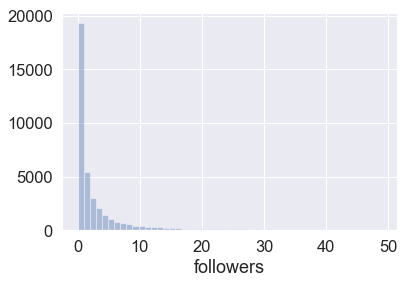

In [40]:
# 关注996工作制的程序员Github粉丝数分布图
sns.set(font_scale=1.5)
sns.distplot(user_data.loc[user_data['followers'] < 50, 'followers'], kde=False)

In [43]:
# 关注996工作制的程序员注册Github时长
user_data['time'] = pd.to_datetime('2019-03-28')- user_data['created_at']

In [51]:
user_data['time'].mean()

Timedelta('1180 days 12:14:39.238977')

In [52]:
# 平均注册市场3.2年
1180/365

3.232876712328767

In [53]:
def get_days(data):
    return data.days

user_data['time_days'] = user_data['time'].apply(get_days)/365

Text(0.5,0,'Year')

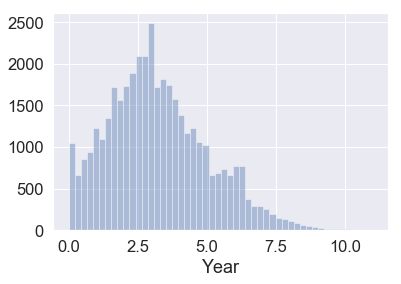

In [64]:
# 关注996工作制的程序员注册Github时长分布图
sns.set(font_scale=1.5)
ax = sns.distplot(user_data['time_days'], kde=False)
ax.set_xlabel('Year')

In [90]:
# 关注996工作制的程序员大牛
user_data.loc[user_data['followers'] > 3000, ['login', 'followers','url', 'bio']]

,login,followers,url,bio
6851,vczh,13793,https://api.github.com/users/vczh,Programmer with no technology bias. Main contr...
7092,chokcoco,4130,https://api.github.com/users/chokcoco,国服第一切图仔
7193,singwhatiwanna,6632,https://api.github.com/users/singwhatiwanna,NaN
8142,Ovilia,8043,https://api.github.com/users/Ovilia,Creative Web Developer & Designer
13325,wizardforcel,5522,https://api.github.com/users/wizardforcel,我自成佛自度我，佛度凡尘我度佛。
19710,yanhaijing,3834,https://api.github.com/users/yanhaijing,知名技术博主，开源达人，《React状态管理与同构实战》作者，yanhaijing.com
21603,liuyubobobo,3392,https://api.github.com/users/liuyubobobo,NaN
27695,draveness,3128,https://api.github.com/users/draveness,Go / Rails / Rust
30008,Germey,3520,https://api.github.com/users/Germey,"Talk is cheap, show me the code."
39663,88250,7006,https://api.github.com/users/88250,开源程序员，自由职业者 🎸 Stairway To Heaven | 再见理想 | 浮夸\r\n


In [66]:
user_data[user_data['followers'] > 1000].shape[0]

47

In [67]:
user_data[user_data['followers'] > 500].shape[0]

110

In [91]:
user_data[user_data['followers'] > 100].shape[0]

598

#### 3.4 大家所关注的问题都有哪些？

In [68]:
issues_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 5 columns):
comments      10037 non-null int64
id            10037 non-null int64
title         10037 non-null object
updated_at    10037 non-null datetime64[ns]
user.id       10037 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 392.1+ KB


In [74]:
issues_data.iloc[issues_data['comments'].nlargest(10).index][['title', 'comments']]

,title,comments
2553,Discussion thread,1243
2610,"求个""工作 996，生病 ICU"" 壁纸 打算做电脑壁纸",62
6246,以后，简历上可以写， 参加过2000+ star 开源项目。,53
8304,我不懂法律，但是我想知道到底违法不？,39
1121,996.ICU能进star榜历史前十吗？,37
5833,关于 反996制度运动 的一些实际性建议,30
5870,一边拿着公司的钱，还一边挖苦公司，吃相真难看,30
3672,今晚加班，到10W删库。,26
6253,96年萌妹程序员找男盆友,25
5161,给袁博磕头,24


In [75]:
# 大家都在讨论什么东西呢？
import jieba
from collections import Counter
from pyecharts import WordCloud

jieba.add_word('996')
jieba.add_word('996制度')
jieba.add_word('ICU')

swords = [x.strip() for x in open ('stopwords.txt')]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/mc/k6p_zt453w770h63024z__vw0000gn/T/jieba.cache
Loading model cost 1.211 seconds.
Prefix dict has been built succesfully.


In [76]:
def plot_word_cloud(data, swords):
    text = ''.join(data['title'])
    words = list(jieba.cut(text))
    ex_sw_words = []
    for word in words:
        if len(word)>1 and (word not in swords):
            ex_sw_words.append(word)
    c = Counter()
    c = Counter(ex_sw_words)
    wc_data = pd.DataFrame({'word':list(c.keys()), 'counts':list(c.values())}).sort_values(by='counts', ascending=False).head(100)
    wordcloud = WordCloud(width=1300, height=620)
    wordcloud.add("", wc_data['word'], wc_data['counts'], word_size_range=[20, 100])
    return wordcloud

In [77]:
plot_word_cloud(issues_data, swords=swords)

#### 3.5 关注996的程序员简介词云图

In [81]:
def plot_word_cloud(data, swords):
    text = ''.join(data['bio'].astype('str'))
    words = list(jieba.cut(text))
    ex_sw_words = []
    for word in words:
        if len(word)>1 and (word not in swords):
            ex_sw_words.append(word)
    c = Counter()
    c = Counter(ex_sw_words)
    wc_data = pd.DataFrame({'word':list(c.keys()), 'counts':list(c.values())}).sort_values(by='counts', ascending=False).head(100)
    wordcloud = WordCloud(width=1300, height=620)
    wordcloud.add("", wc_data['word'], wc_data['counts'], word_size_range=[20, 100])
    return wordcloud

In [83]:
swords.extend(['the', 'is', 'and', 'of', 'be', 'to', 'in', 'for', 'from', 'am'])
plot_word_cloud(user_data, swords=swords)